<a href="https://colab.research.google.com/github/al025/Python_import_data/blob/master/chap1_classification_sklearn_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import necessary models
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the iris dataset
plt.style.use('ggplot')
iris = datasets.load_iris()
# a Bunch is a dictionary-like object
type(iris)

sklearn.utils.Bunch

In [4]:
# play with keys and values in the iris dataset
print(iris.keys())
print(type(iris.data))
print(type(iris.target))
print(iris.target_names)
print(iris.feature_names)
print(iris.filename)
print(iris.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ===

In [5]:
# create the feature matrix (N,D) and the target vector (N,)
X, y = iris.data, iris.target
# create a DataFrame from the feature matrix
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
# use df.info() to see the shape, missing values, and dtype
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [10]:
# use df.describe() to see the numerical exploratory data analysis (EDA)
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000


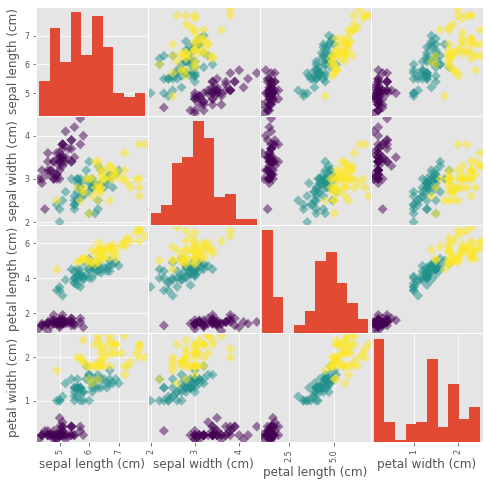

In [8]:
# use pd.plotting to visualize EDA
_ = pd.plotting.scatter_matrix(df, figsize=(8,8), c=y, marker='D', s=50)

In [0]:
# to show how well the model generalize to unseen data, we split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, stratify=y)

In [13]:
# fit() train the model, score() evaluate the accuracy of model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.9736842105263158

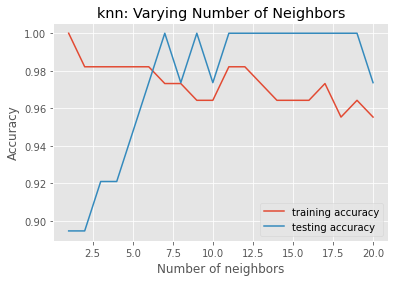

In [17]:
# Let's experiment with differnt values of the hyperparameter: n_neighbors 
# and see that a value too small results in overfitting whereas
# a value too large results in underfitting
neighbors = np.arange(1,21)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_acc[i] = knn.score(X_train, y_train)
  test_acc[i] = knn.score(X_test, y_test)

plt.title("knn: Varying Number of Neighbors")
plt.plot(neighbors, train_acc, label='training accuracy')
plt.plot(neighbors, test_acc, label='testing accuracy')
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()
